In [1]:
import pandas as pd
from glob import glob
import math
import numpy as np
from skimage import io, morphology, img_as_ubyte, img_as_float, filters
import os
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from shapely.geometry import LineString, MultiPoint
from shapely.ops import split
from scipy import io as sio
from centerline import CenterLine, smooth_mask, iou

### Process baselines in batch

In [ ]:
### Process a batch of images with ridge detector
img_fnames = glob('evaluations/pilot/network_output/resTe/*_I.png')
masks_dir = 'evaluations/pilot/ridge_detector'
labels_dir = 'annotations/coarse_ridge/labels'
os.makedirs(masks_dir, exist_ok=True)
# os.makedirs(labels_dir, exist_ok=True)
for img_fname in tqdm(img_fnames):
    centerline_ridge = CenterLine(associate_image=io.imread(img_fname))
    line_dict = centerline_ridge.ridge_detector(config_fname="ridge_detector_params.json")
    centerline_ridge = CenterLine(line_dict=line_dict, associate_image=io.imread(img_fname))
    img_name = os.path.splitext(img_fname.split(os.sep)[-1])[0]
    csv_fname = os.path.join(labels_dir, img_name+'.csv')
    masks_fname = os.path.join(masks_dir, img_name+'.tif')
    centerline_ridge.export_line_dict(csv_fname)
    io.imsave(masks_fname, img_as_ubyte(centerline_ridge.centerline_image), check_contrast=False)

In [ ]:
### Process a batch of mat files produced by ctFIRE
mat_fnames = glob('evaluations/pilot/ctFIRE_dir/ctFIREout/*.mat')
masks_dir = 'evaluations/pilot/ctFIRE_out'
labels_dir = 'evaluations/pilot/ctFIRE_labels'
os.makedirs(masks_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)
for mat_fname in tqdm(mat_fnames):
    centerline_mat = CenterLine()
    mat = sio.loadmat(mat_fname)
    mat_data = mat['data']
    line_dict = centerline_mat.mat_to_lines(mat_data=mat_data)
    centerline_mat = CenterLine(line_dict=line_dict, image_size=(256, 256))
    img_name = os.path.splitext(mat_fname.split(os.sep)[-1])[0].split('ctFIREout_')[-1]
    csv_fname = os.path.join(labels_dir, img_name+'.csv')
    masks_fname = os.path.join(masks_dir, img_name+'.tif')
    centerline_mat.export_line_dict(csv_fname)
    io.imsave(masks_fname, img_as_ubyte(centerline_mat.centerline_image), check_contrast=False)

In [ ]:
### Process a batch of annotations and generate the masks
csv_fnames = glob('annotations/round_2/labels/*.csv')
masks_dir = 'annotations/round_2/masks'
labels_dir = 'annotations/round_2/labels'
os.makedirs(masks_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)
for csv_fname in csv_fnames:
    centerline_ridge = CenterLine(dataframe=pd.read_csv(csv_fname, index_col=0))
    img_name = os.path.splitext(csv_fname.split(os.sep)[-1])[0]
    masks_fname = os.path.join(masks_dir, img_name+'.tif')
    io.imsave(masks_fname, img_as_ubyte(centerline_ridge.centerline_image), check_contrast=False)

### Measure the similarity of two centerline (masks)

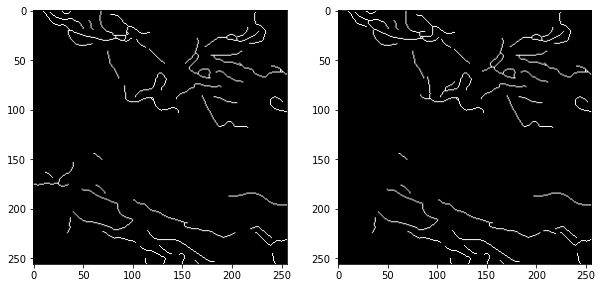

In [17]:
### any two centerline masks
image_1 = io.imread('Michael.tif')
image_2 = io.imread('Bin.tif')
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image_1, cmap='gray')
ax[1].imshow(image_2, cmap='gray')

0.9228023152549197


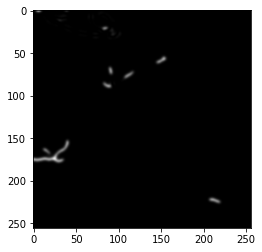

In [18]:
### Pixel-level metrics, soft IoU
ratio, U, I = iou(smooth_mask(image_1), smooth_mask(image_2), soft=True)
plt.imshow(U-I, cmap='gray')
print(np.sum(I)/np.sum(U))

### Post-processing

In [2]:
### Process a batch of network output
raw_nw_fnames = glob('evaluations/pilot/41aug_output/resTe/*_Lpred.png')
raw_input_fnames = glob('evaluations/pilot/41aug_output/resTe/*_I.png')
masks_dir = 'evaluations/pilot/41aug_output/processed/skeletonize'
os.makedirs(masks_dir, exist_ok=True)
# os.makedirs(labels_dir, exist_ok=True)
for i in tqdm(range(len(raw_input_fnames))):
    nw_fname = raw_nw_fnames[i]
    input_fname = raw_input_fnames[i]

    img = img_as_float( io.imread( nw_fname ))
    # binary = img > filters.threshold_otsu((img))
    binary = img

    ### vectorization using ridge detector
    # centerline_res = CenterLine(associate_image=binary)
    # line_dict = centerline_res.ridge_detector(config_fname="ridge_detector_params.json")
    # centerline_res = CenterLine(line_dict=line_dict, associate_image=io.imread(input_fname))

    ### vectorization using skeletonization
    centerline_res = CenterLine(associate_image=binary, draw_from_raw=True)

    img_name = os.path.splitext(input_fname.split(os.sep)[-1])[0]
    masks_fname = os.path.join(masks_dir, img_name+'.tif')
    io.imsave(masks_fname, img_as_ubyte(centerline_res.centerline_image), check_contrast=False)
    # io.imsave(masks_fname, img_as_ubyte(image), check_contrast=False)

  0%|          | 0/199 [00:00<?, ?it/s]

Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks using skeletonization
Draw masks